## Homework #4. Exploratory Data Analysis
#### Author: `Valentyna Dermenzhy`
#### Total time spent on h/w (in minutes): `490`

In [1]:
import pandas as pd

In [2]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Task 2.1
## Messages data analysis

In [5]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,382863,2024-10-25 17:01:53+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,🐵,sticker,NaN,-1001142723513
1,382862,2024-10-25 17:01:23+00:00,PeerUser(user_id=256994245),PeerChannel(channel_id=1142723513),NaN,🤺,sticker,NaN,-1001142723513
2,382860,2024-10-25 17:01:11+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,небо все тобі дасть,text,NaN,-1001142723513
3,382859,2024-10-25 17:01:03+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,🙏,sticker,NaN,-1001142723513
4,382858,2024-10-25 17:00:55+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,в сенсі молися,text,NaN,-1001142723513
5,382857,2024-10-25 17:00:43+00:00,PeerUser(user_id=509580698),PeerChannel(channel_id=1142723513),NaN,в сенсі суїциду чи..??,text,NaN,-1001142723513
6,382856,2024-10-25 17:00:09+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,бог,text,NaN,-1001142723513
7,382855,2024-10-25 16:59:04+00:00,PeerUser(user_id=509580698),PeerChannel(channel_id=1142723513),NaN,а мене хто заадоптить..,text,NaN,-1001142723513
8,382854,2024-10-25 16:58:22+00:00,PeerUser(user_id=347398049),PeerChannel(channel_id=1142723513),NaN,NaN,photo,NaN,-1001142723513
9,382853,2024-10-25 16:58:15+00:00,PeerUser(user_id=599821131),PeerChannel(channel_id=1142723513),NaN,адопт мі,text,NaN,-1001142723513


In [6]:
df.shape

(1694041, 9)

In [7]:
min(df["date"]),max(df["date"])

('2017-10-02 20:51:45+00:00', '2024-10-25 17:01:53+00:00')

In [8]:
df.groupby(["type"])["type"].count()

type
photo       281849
sticker      26690
text       1306404
video        45210
voice        33888
Name: type, dtype: int64

In [9]:
df.groupby(["type"])["duration"].sum()

type
photo      0.000000e+00
sticker    0.000000e+00
text       0.000000e+00
video      1.287400e+06
voice      1.149871e+06
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [5]:
my_tg_id = "797970730"

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [11]:
user_messages = df[df['from_id'].str.contains(my_tg_id, na=False)]

print(user_messages.head(4))

#I decided to look at 4 messages as one of first three was NaN, as it was joining the group message

            id                       date                      from_id  \
96249   285469  2024-03-11 07:12:36+00:00  PeerUser(user_id=797970730)   
184136  195844  2023-08-28 09:50:09+00:00  PeerUser(user_id=797970730)   
370692   15441  2021-12-10 16:07:50+00:00  PeerUser(user_id=797970730)   
370803   15290  2021-10-01 09:31:22+00:00  PeerUser(user_id=797970730)   

                                     to_id fwd_from  \
96249   PeerChannel(channel_id=1142723513)      NaN   
184136  PeerChannel(channel_id=1142723513)      NaN   
370692  PeerChannel(channel_id=1205907880)      NaN   
370803  PeerChannel(channel_id=1205907880)      NaN   

                                                  message  type  duration  \
96249   думаю чи брати "Інструменти та принципи веб-ро...  text       NaN   
184136                                                NaN  text       NaN   
370692  https://vseosvita.ua/private/test-flash/347287...  text       NaN   
370803                                       

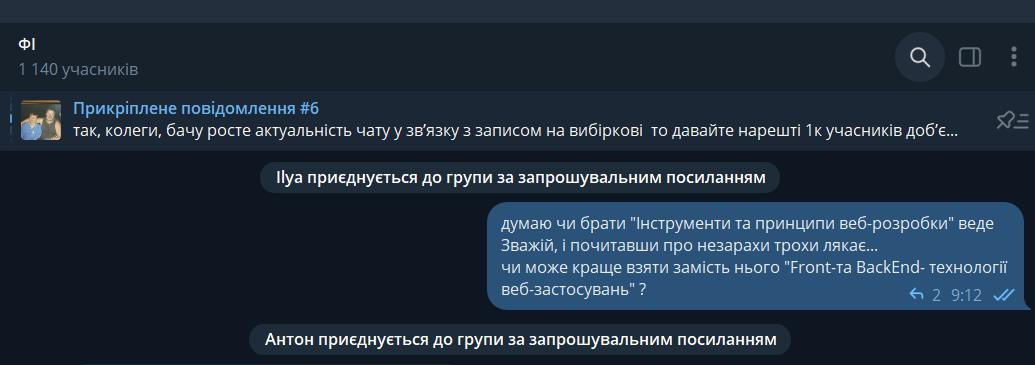

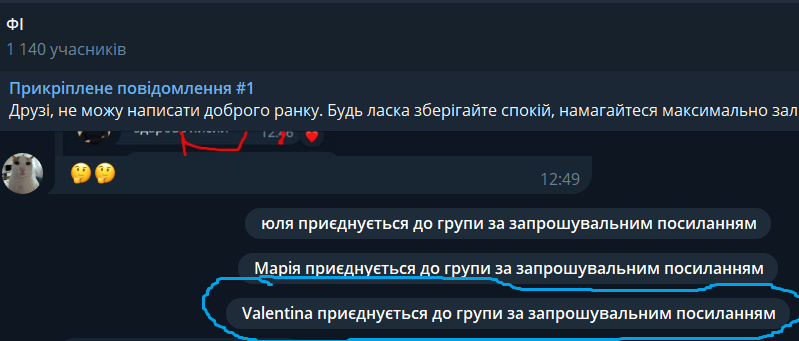

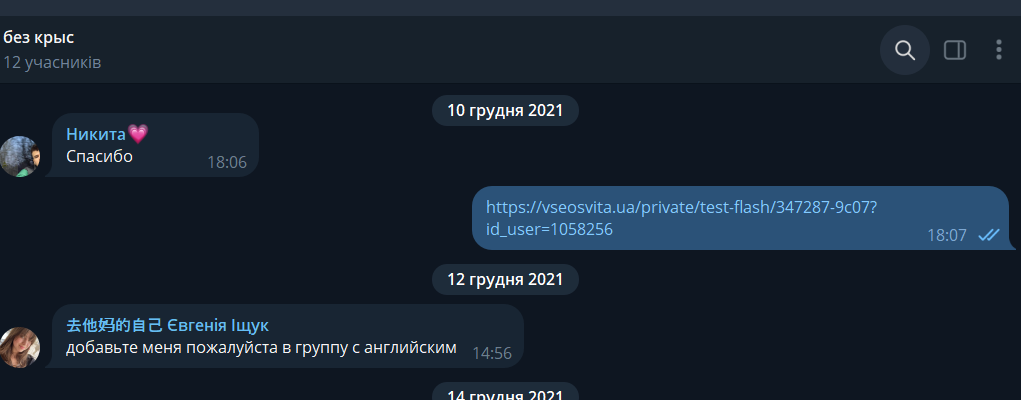

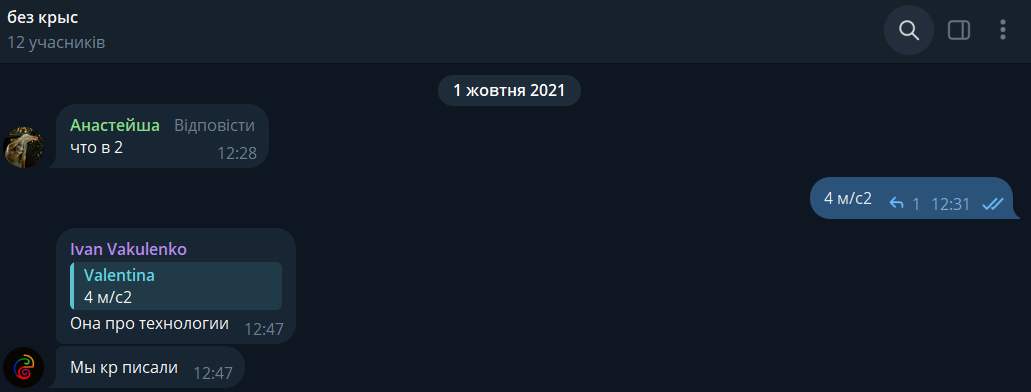

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [12]:
audio_messages = df[(df['type'] == 'voice') & (df['from_id'].str.contains(my_tg_id, na=False))]

longest_audio_idx = audio_messages['duration'].idxmax()
longest_audio = audio_messages.loc[longest_audio_idx]

print(longest_audio[['id', 'date', 'from_id', 'duration', 'dialog_id']])
# the time of the message is correct, but it is in a different time zone (utc+0) than in Kyiv (utc+3).

id                                443751
date           2023-05-05 19:17:13+00:00
from_id      PeerUser(user_id=797970730)
duration                           847.0
dialog_id                      543829731
Name: 1379597, dtype: object


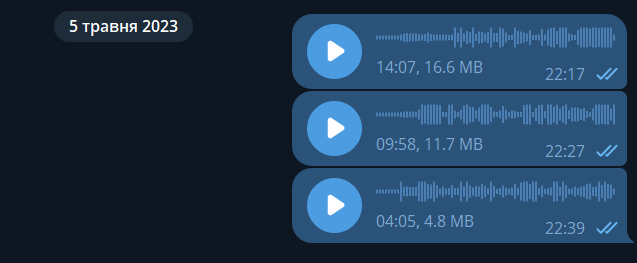

4. Calculate numbers of send and received(s&r) messages.

In [8]:
def count_messages(df, my_tg_id):

    df['from_id'] = df['from_id'].astype(str)
    df['to_id'] = df['to_id'].astype(str)
    df['dialog_id'] = df['dialog_id'].astype(str)
    sent_messages = df['from_id'].str.contains(my_tg_id, na=False)
    received_messages = ~df['from_id'].str.contains(my_tg_id, na=False)


    num_sent_messages = sent_messages.sum()
    num_received_messages = received_messages.sum()

    print(f"Sent messages: {num_sent_messages}")
    print(f"Received messages: {num_received_messages}")

    return num_sent_messages, num_received_messages

count_messages(df, my_tg_id)

Sent messages: 209464
Received messages: 1484577


(209464, 1484577)

5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

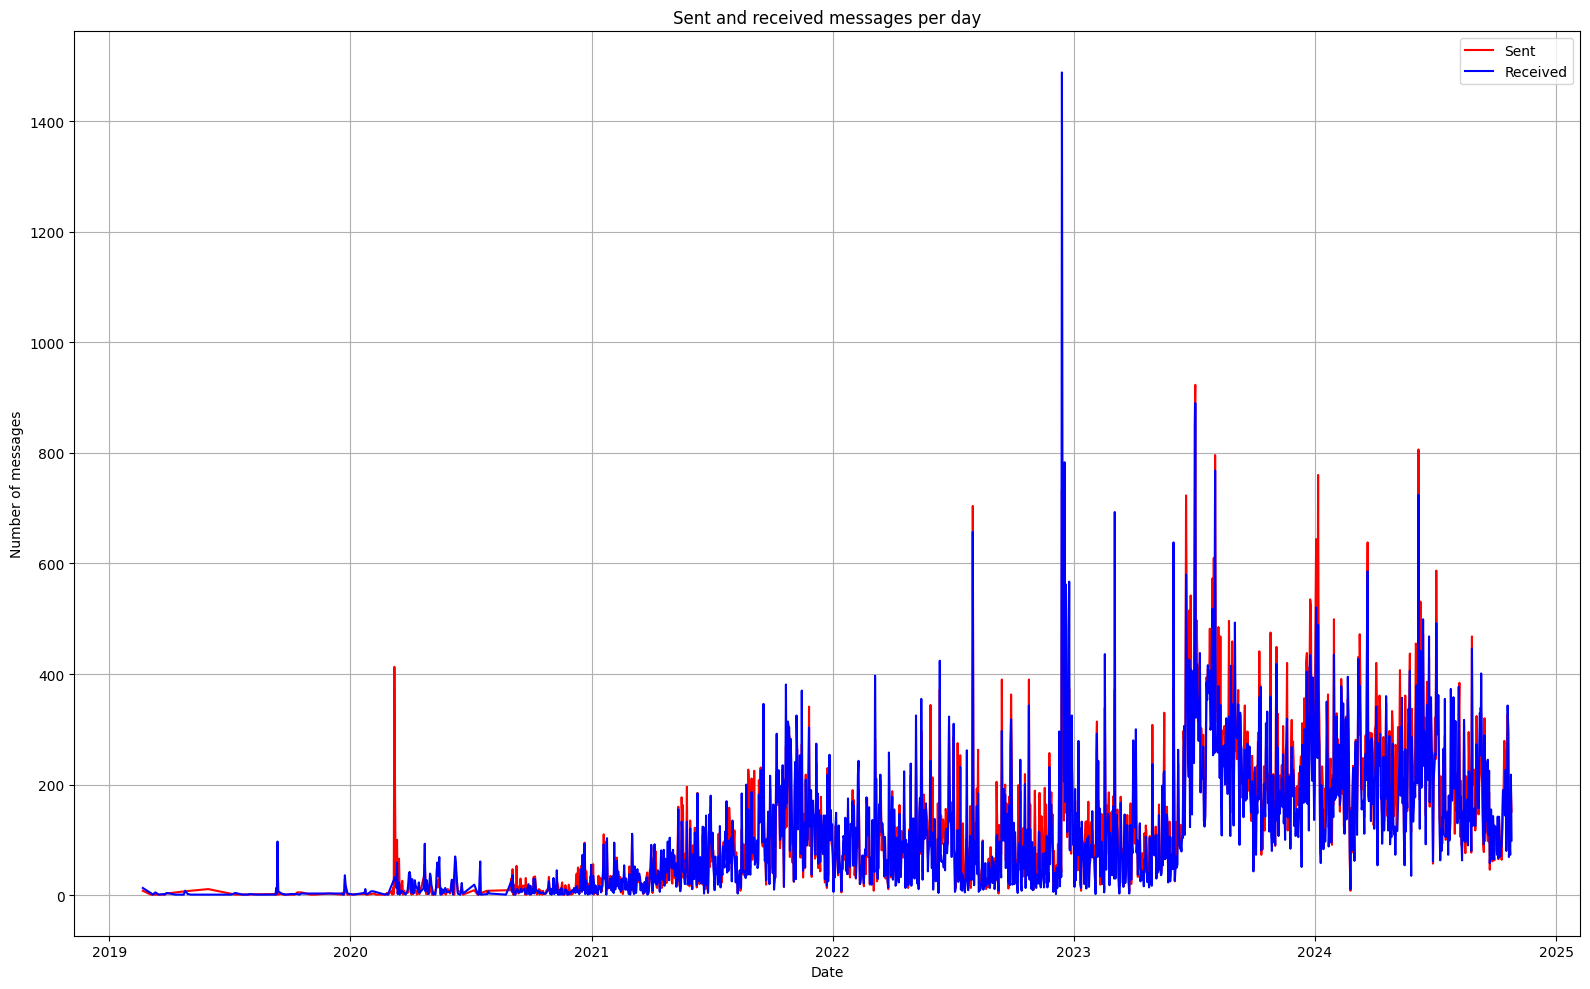

In [15]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

sent_messages = df['from_id'].str.contains(my_tg_id, na=False)
received_messages = df['to_id'].str.contains(my_tg_id, na=False)

sent_messages_df = df[sent_messages]
received_messages_df = df[received_messages]

sent_per_day = sent_messages_df['date'].dt.floor('D').value_counts().sort_index()
received_per_day = received_messages_df['date'].dt.floor('D').value_counts().sort_index()

plt.figure(figsize=(16, 10))
plt.plot(sent_per_day.index, sent_per_day, color='red', label='Sent')
plt.plot(received_per_day.index, received_per_day, color='blue', label='Received')

plt.title('Sent and received messages per day')
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

#### `Distribution of messages by type`

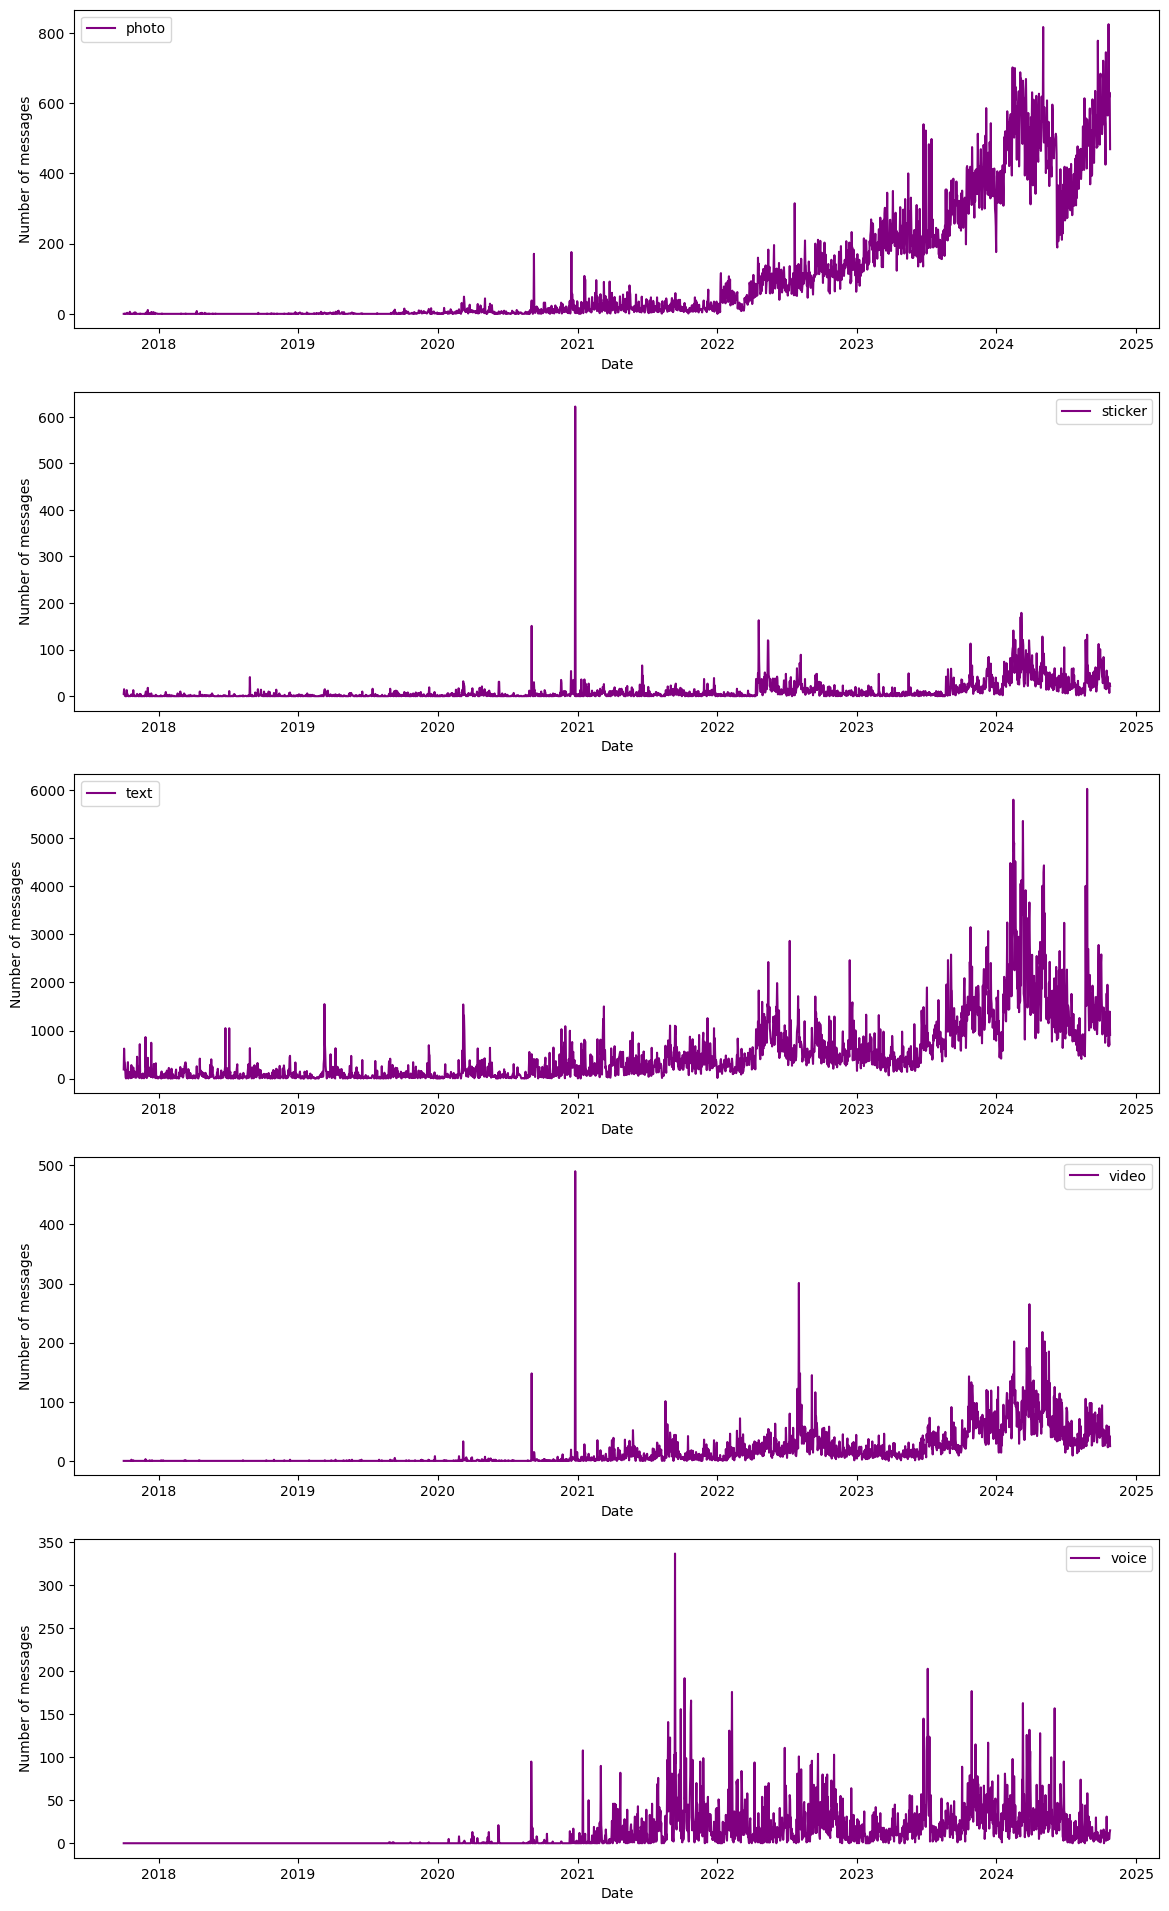

In [18]:
df_copy = df.copy()

df_copy['date'] = pd.to_datetime(df_copy['date']).dt.floor('D')
messages_per_type_time = df_copy.groupby(['date', 'type']).size().unstack(fill_value=0)
messages_per_type_total = df_copy['type'].value_counts()

num_types = len(messages_per_type_time.columns)

fig, axes = plt.subplots(num_types, 1, figsize=(14, 4 * (num_types + 1)))

for idx, message_type in enumerate(messages_per_type_time.columns):
    axes[idx].plot(messages_per_type_time.index, messages_per_type_time[message_type], label=message_type, color='purple')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Number of messages')
    axes[idx].legend()

In [ ]:
#title for the next 5 diagrams is above the code ("Distribution of messages by type"), i placed it that way so during the convertion to pdf 
#will be on the same paged and won't be sliced

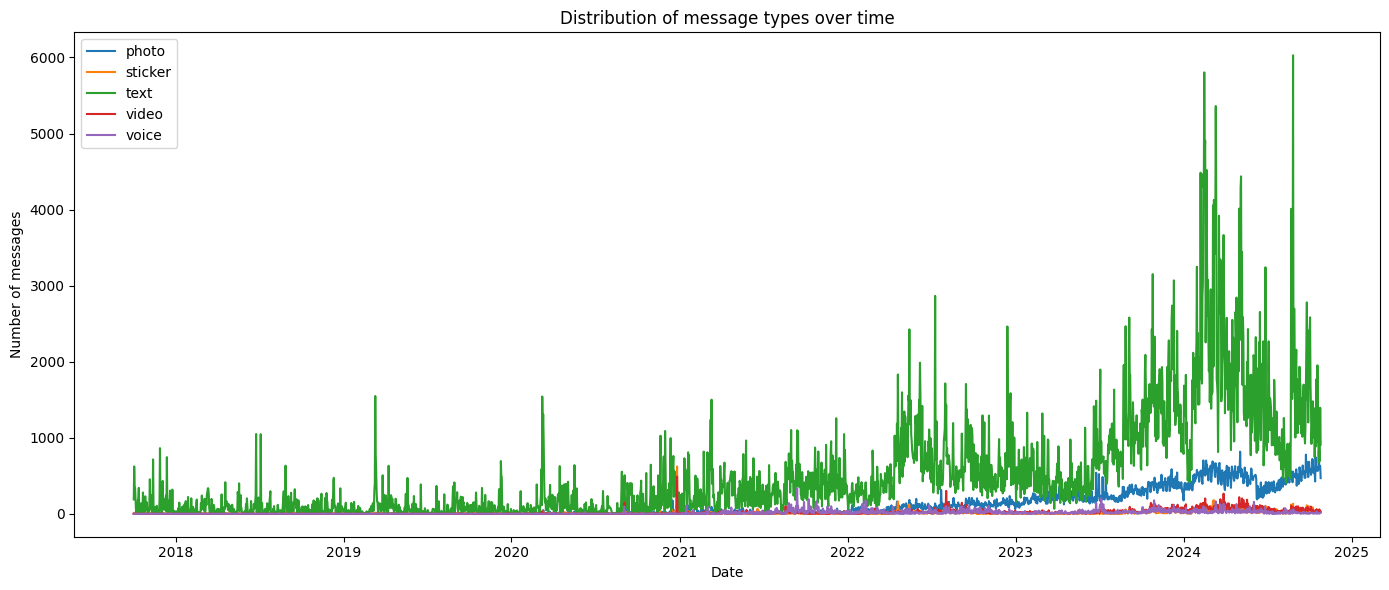

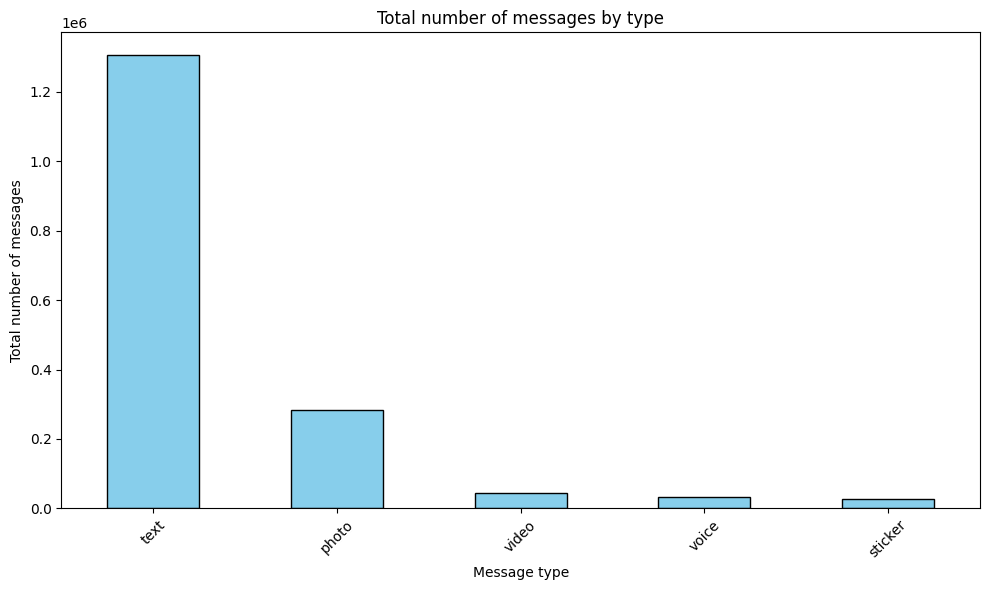

In [19]:
plt.figure(figsize=(14, 6))
for col in messages_per_type_time.columns:
    plt.plot(messages_per_type_time.index, messages_per_type_time[col], label=col)

plt.title('Distribution of message types over time')
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
messages_per_type_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Message type')
plt.ylabel('Total number of messages')
plt.title('Total number of messages by type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [20]:
df_copy = df.copy()

df_copy['from_id'] = df_copy['from_id'].str.split('=').str[1].str[:-1]
filtered_df = df_copy[df_copy['from_id'] == my_tg_id]
filtered_df = filtered_df[~filtered_df['to_id'].str.contains('PeerChat', na=False)]

top_people = filtered_df.groupby('to_id').size().reset_index(name='message_num')
top_ten = top_people.nlargest(10, 'message_num')
top_ten.index = range(1, len(top_ten) + 1)

print(top_ten)

         to_id  message_num
1    857650813        88242
2    543829731        15310
3    918945448        13677
4    864772247         8919
5    168835021         8723
6   1283086549         8616
7    766664175         5095
8    739689001         4095
9    633836915         3607
10   813742851         3011


8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [21]:
df_copy = df.copy()

received_messages_df = df_copy[df_copy['to_id'] == my_tg_id]

if received_messages_df.empty:
    print("No messages found to your ID.")
else:
    print(f"{len(received_messages_df)} messages was sent my ID.")

top_senders = received_messages_df['from_id'].value_counts().head(10)

if top_senders.empty:
    print("No senders found.")
else:
    print("Top 10 senders:")
    print(top_senders)

print(received_messages_df['from_id'])

#there is no info about people who sent me messages, the fields - NaN

193857 messages was sent my ID.
No senders found.
1318668    NaN
1318669    NaN
1318670    NaN
1318674    NaN
1318677    NaN
          ... 
1694029    NaN
1694030    NaN
1694032    NaN
1694034    NaN
1694036    NaN
Name: from_id, Length: 193857, dtype: object


## Task 2.2
## Dialogs data analysis

In [29]:
df_meta.shape

(10356, 4)

In [30]:
df_meta.head(10)

,dialog_id,name,type,users
0,-1001142723513,ФІ,Group,"{'user_id': 679210513, 'first_name': 'Антон', ..."
1,-1001142723513,ФІ,Group,"{'user_id': 347624504, 'first_name': 'Настя Чи..."
2,-1001142723513,ФІ,Group,"{'user_id': 442570824, 'first_name': 'веронічк..."
3,-1001142723513,ФІ,Group,"{'user_id': 321298689, 'first_name': 'Денис Др..."
4,-1001142723513,ФІ,Group,"{'user_id': 1898640446, 'first_name': 'Артур',..."
5,-1001142723513,ФІ,Group,"{'user_id': 959076053, 'first_name': 'Настя', ..."
6,-1001142723513,ФІ,Group,"{'user_id': 1272391741, 'first_name': 'Ваня', ..."
7,-1001142723513,ФІ,Group,"{'user_id': 797970730, 'first_name': 'Valentin..."
8,-1001142723513,ФІ,Group,"{'user_id': 857650813, 'first_name': 'Никита💗'..."
9,-1001142723513,ФІ,Group,"{'user_id': 1021793326, 'first_name': 'настюша..."


In [31]:
df_meta.groupby(["type"])["type"].count()

type
Group             10132
Private dialog      224
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [59]:
group_name = "ШПРОТИKN"
group_meta = df_meta[df_meta['name'] == group_name]
group_id = group_meta['dialog_id'].iloc[0]
    
participants = group_meta['users'].tolist()

print(f"Group name: {group_name}")
print(f"Group ID: {group_id}")
for participant in participants:
    print(participant)

Group name: ШПРОТИKN
Group ID: -1001806752179
{'user_id': 636997472, 'first_name': 'allyксандра', 'last_name': None, 'username': 'MailBe', 'phone': None}
{'user_id': 797970730, 'first_name': 'Valentina', 'last_name': None, 'username': 'valuuusha', 'phone': '380938534070'}
{'user_id': 721596976, 'first_name': 'Дмитро', 'last_name': 'Важний', 'username': 'uzumaki_9087', 'phone': None}
{'user_id': 442570824, 'first_name': 'веронічка', 'last_name': None, 'username': 'dujlhub', 'phone': None}
{'user_id': 668261900, 'first_name': 'Victoria', 'last_name': None, 'username': 'Victoria7778', 'phone': '380988207230'}
{'user_id': 1012208189, 'first_name': 'Gezes', 'last_name': 'Wwrg', 'username': 'Gezes_Wwrg', 'phone': None}
{'user_id': 347624504, 'first_name': 'Настя Числівник', 'last_name': None, 'username': 'eleyuss', 'phone': '380504710462'}
{'user_id': 959076053, 'first_name': 'Настя', 'last_name': None, 'username': 'anastasia_aq', 'phone': None}
{'user_id': 701650957, 'first_name': 'Слава', 

2. Draw distribution of group sizes.

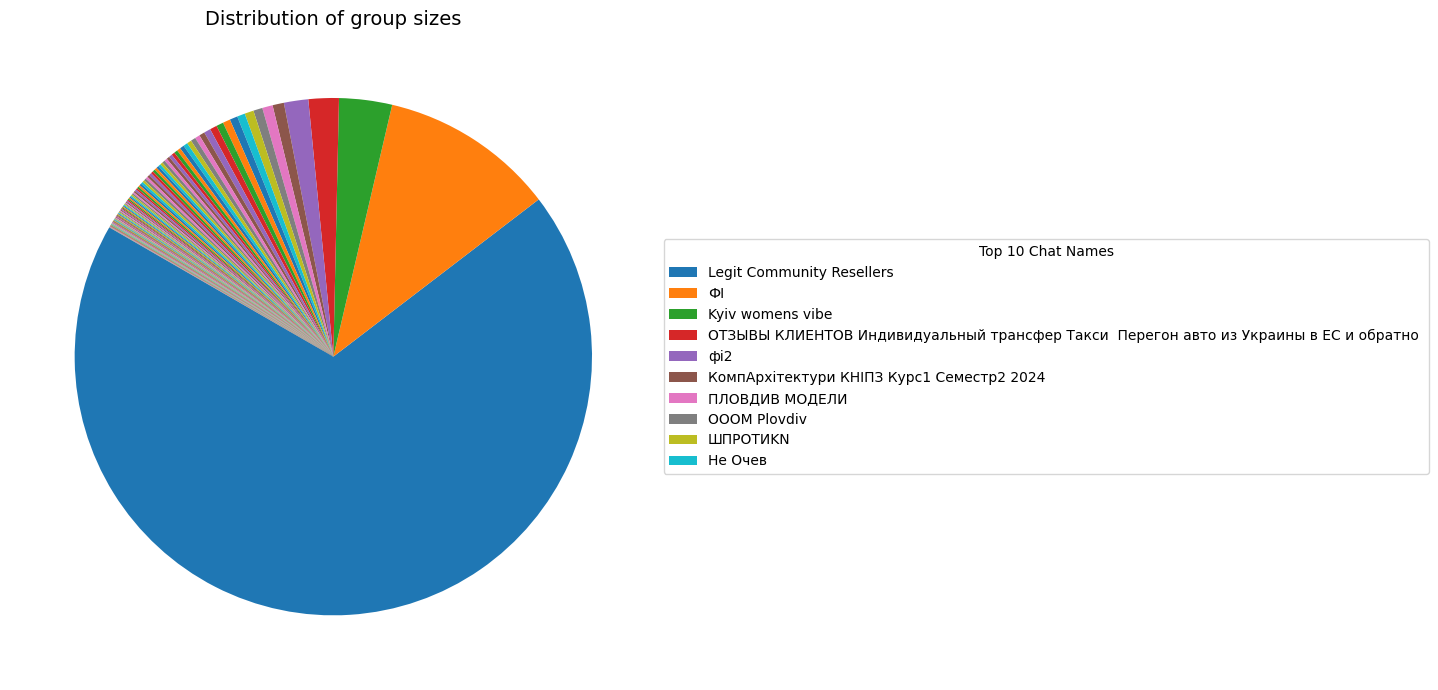

In [198]:
import re

df_meta_copy = df_meta.copy()
df_meta_copy = df_meta_copy[df_meta_copy['type'] != 'Private dialog']
df_meta_copy['name'] = df_meta_copy['name'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

grouped_size = df_meta_copy.groupby(['dialog_id', 'name']).size().reset_index(name='members_num')

top_chats = grouped_size.sort_values(by='members_num', ascending=False)

labels = [top_chats['name'].iloc[i] if i < 10 else '' for i in range(len(top_chats))]
sizes = top_chats['members_num']

plt.figure(figsize=(14, 7))
wedges, texts = plt.pie(sizes, startangle=150, textprops={'fontsize': 10})
plt.legend(wedges[:10], labels[:10], title="Top 10 Chat Names", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of group sizes', fontsize=14)
plt.tight_layout()
plt.show()


3. Calculate top-10 the biggest groups/channels.

In [82]:
dialog_participants = df_meta.groupby(['name']).size().reset_index(name='participants_num')

top_10 = dialog_participants.nlargest(10, 'participants_num')
top_10.index = range(1, len(top_10) + 1)

print(top_10)

                                                 name  participants_num
1                           Legit Community Resellers              6964
2                                                  ФІ              1109
3                                Kyiv women's vibe ❤️               335
4   ОТЗЫВЫ КЛИЕНТОВ 🚘Индивидуальный трансфер. Такс...               192
5                                                фі-2               154
6   КомпАрхітектури (КН+ІПЗ), Курс-1, Семестр-2, 2...                72
7                                      ПЛОВДИВ МОДЕЛИ                66
8                                        OOOM Plovdiv                58
9                                            ШПРОТИKN                57
10                                         Не "Очев."                50


4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [199]:
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

df_meta['user_id'] = df_meta['users'].str.extract(r"'user_id':\s*(\d+)")
df_meta_filtered = df_meta[df_meta['user_id'].notna()]

distinct_user_ids = df_meta_filtered['user_id'].nunique()

print(f'The number of distinct user IDs I am connected to: {distinct_user_ids}')

The number of distinct user IDs I am connected to: 9033
